### Data Engineering and Feature Extraction 

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath("../Scripts"))
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('..')

In [3]:
from load_data import *
from ip_conversion import convert_int_to_ip

Data Loading and Inspection

Fraud Dataset

In [4]:
fraud_df =load_and_preview('Data/Fraud_Data.csv')
fraud_df.head()

Loaded 'Data/Fraud_Data.csv' successfully


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


IP Address Dataset

In [5]:
ip_df =load_and_preview('Data/IpAddress_to_Country.csv')
ip_df.head()

Loaded 'Data/IpAddress_to_Country.csv' successfully


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


Credit Card Dataset

In [6]:
credit_df =load_and_preview('Data/creditcard.csv')
credit_df.head()

Loaded 'Data/creditcard.csv' successfully


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


1. Handle Missing Values
    
    Impute or drop missing values

In [7]:
null_counts_row = pd.DataFrame([fraud_df.isnull().sum()])
display('The Fraud Data of Null Values Checking:', null_counts_row)

'The Fraud Data of Null Values Checking:'

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
null_counts_row = pd.DataFrame([ip_df.isnull().sum()])
display('The IP Address of Null Values Checking:', null_counts_row)

'The IP Address of Null Values Checking:'

,lower_bound_ip_address,upper_bound_ip_address,country
0,0,0,0


In [9]:
null_counts_row = pd.DataFrame([credit_df.isnull().sum()])
display('The Credit Data of Null Values Checking:', null_counts_row)

'The Credit Data of Null Values Checking:'

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**2. Data Cleaning**

      Remove duplicates

In [10]:
print('The Fraud Data of Duplicated Value Checking:', fraud_df.duplicated().sum() )
print('The IP Address Data of Duplicated Value Checking:', ip_df.duplicated().sum() )
print('The Credit Data of Duplicated Value Checking:', credit_df.duplicated().sum())

The Fraud Data of Duplicated Value Checking: 0
The IP Address Data of Duplicated Value Checking: 0
The Credit Data of Duplicated Value Checking: 1081


In [11]:
# Credit Data Duplicate Cleaning
print("Before removing duplicates:", credit_df.duplicated().sum())

# Drop duplicates
credit_df = credit_df.drop_duplicates()

print("After removing duplicate of value of  Credit Data is:", credit_df.duplicated().sum())

Before removing duplicates: 1081
After removing duplicate of value of  Credit Data is: 0


   Correct data types

In [12]:
# Check and convert data types
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])

# Ensure categorical features are properly encoded
fraud_df['source'] = fraud_df['source'].astype('category')
fraud_df['browser'] = fraud_df['browser'].astype('category')
fraud_df['sex'] = fraud_df['sex'].astype('category')

In [13]:
display(fraud_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  category      
 6   browser         151112 non-null  category      
 7   sex             151112 non-null  category      
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: category(3), datetime64[ns](2), float64(1), int64(4), object(1)
memory usage: 9.7+ MB


None

Outlier Detection

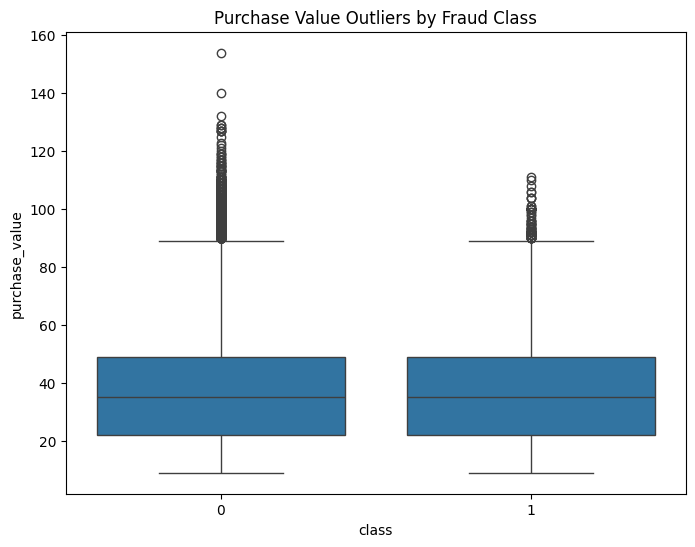

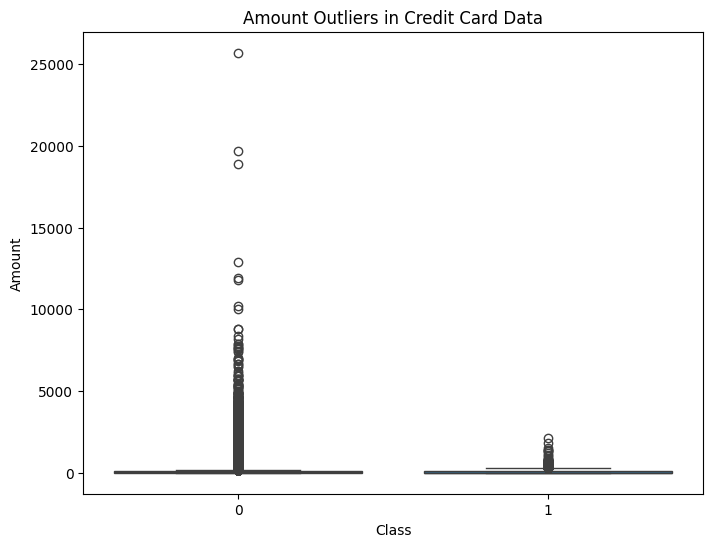

In [26]:
# Boxplot for detecting outliers in purchase_value
plt.figure(figsize=(8, 6))
sns.boxplot(data=fraud_df, x='class', y='purchase_value')
plt.title('Purchase Value Outliers by Fraud Class')
plt.show()

# Outlier detection in credit card data (Amount)
plt.figure(figsize=(8, 6))
sns.boxplot(data=credit_df, x='Class', y='Amount')
plt.title('Amount Outliers in Credit Card Data')
plt.show()

**3. Exploratory Data Analysis (EDA)**

      Univariate analysis

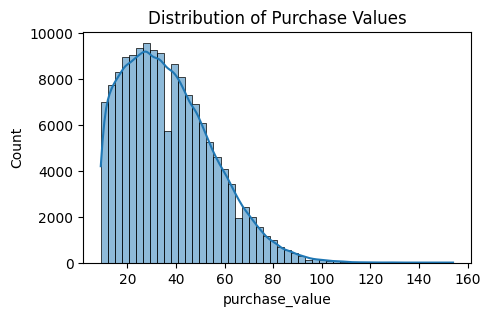

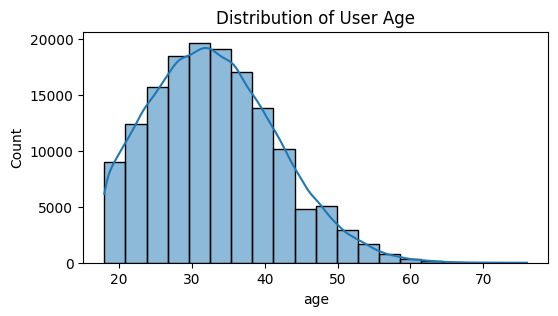

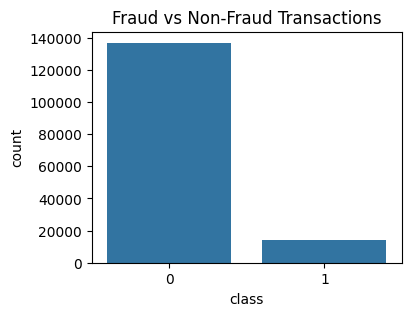

In [14]:
# Distribution of purchase values
plt.figure(figsize=(5, 3))
sns.histplot(fraud_df['purchase_value'], bins=50, kde=True)
plt.title('Distribution of Purchase Values')
plt.show()

# Distribution of user age
plt.figure(figsize=(6, 3))
sns.histplot(fraud_df['age'], bins=20, kde=True)
plt.title('Distribution of User Age')
plt.show()

# Countplot for fraud detection
plt.figure(figsize=(4, 3))
sns.countplot(x='class', data=fraud_df)
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

     Bivariate analysis

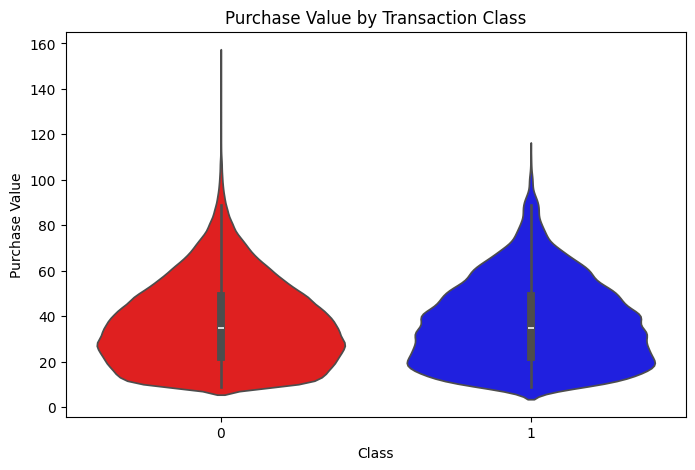

In [15]:
# Convert class to categorical (helps with palette mapping)
fraud_df['class'] = fraud_df['class'].astype('category')

plt.figure(figsize=(8, 5))
sns.violinplot(
    x='class',
    y='purchase_value',
    hue='class',                 # assign x to hue to avoid FutureWarning
    data=fraud_df,
    palette={0: 'red', 1: 'blue'},
    dodge=False,                 # combine violins into one per class
    legend=False                 # hide duplicate legend
)
plt.title('Purchase Value by Transaction Class')
plt.xlabel('Class')
plt.ylabel('Purchase Value')
plt.show()

Class Balance Status

In [34]:
fraud_df['class'] = fraud_df['class'].astype(str)
credit_df['Class'] = credit_df['Class'].astype(str)

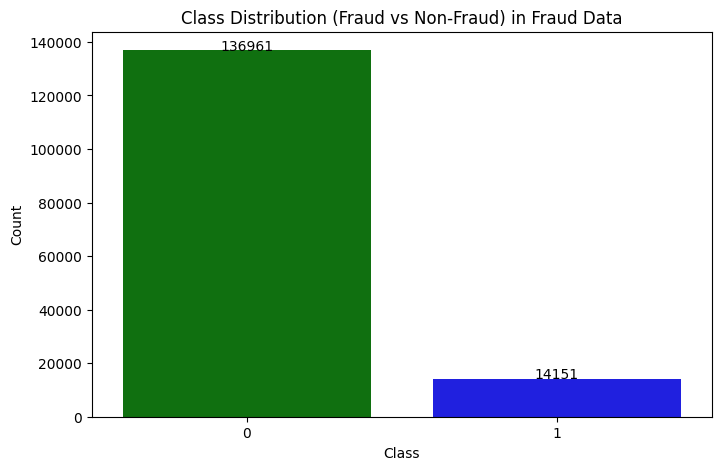

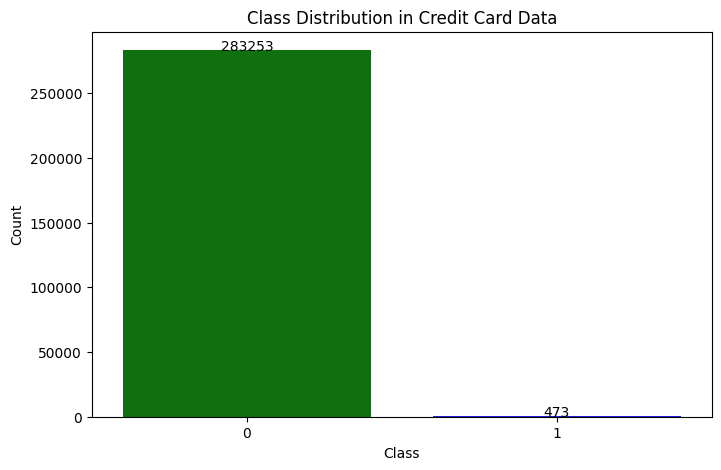

In [46]:
# E-commerce Transaction of Class Distribution
plt.figure(figsize=(8, 5))
ax1 = sns.countplot(x='class',  data=fraud_df,    palette={'0': 'green', '1': 'blue'})
plt.title('Class Distribution (Fraud vs Non-Fraud) in Fraud Data')
plt.xlabel('Class')
plt.ylabel('Count')

# Annotate counts on top of bars
for p in ax1.patches:
    height = p.get_height()
    ax1.text(x=p.get_x() + p.get_width() / 2,  y=height + 0.5,  # slightly above the bar
        s=int(height),
        ha='center'
    )

plt.show()

# Credit Card Transaction of Class Distribution
plt.figure(figsize=(8, 5))
ax2 = sns.countplot(x='Class', data=credit_df, palette={'0': 'green', '1': 'blue'})
plt.title('Class Distribution in Credit Card Data')
plt.xlabel('Class')
plt.ylabel('Count')

# Annotate counts on top of bars
for p in ax2.patches:
    height = p.get_height()
    ax2.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + 0.5,
        s=int(height),
        ha='center'
    )

plt.show()

**4. Merge Datasets for Geolocation Analysis**

       Convert IP addresses to integer format


In [16]:
fraud_df['ip_add'] = fraud_df['ip_address'].apply(convert_int_to_ip)

ip_df['lower_ip'] = ip_df['lower_bound_ip_address'].apply(convert_int_to_ip)
ip_df['upper_ip'] = ip_df['upper_bound_ip_address'].apply(convert_int_to_ip)

Merge Fraud_Data.csv with IpAddress_to_Country.csv

In [20]:
merged_df = pd.concat([fraud_df, ip_df], axis = 1)
merged_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_add,lower_bound_ip_address,upper_bound_ip_address,country,lower_ip,upper_ip
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,43.173.1.96,16777216.0,16777471.0,Australia,1.0.0.0,1.0.0.255
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,20.225.83.219,16777472.0,16777727.0,China,1.0.1.0,1.0.1.255
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,156.64.132.28,16777728.0,16778239.0,China,1.0.2.0,1.0.3.255
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,228.234.6.235,16778240.0,16779263.0,Australia,1.0.4.0,1.0.7.255
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,24.197.75.141,16779264.0,16781311.0,China,1.0.8.0,1.0.15.255


In [21]:
fraud_df_combined = merged_df.dropna()

In [22]:
merged_df.shape, fraud_df_combined.shape

((151112, 17), (138846, 17))

In [48]:
merged_df.isnull().sum()

user_id                       0
signup_time                   0
purchase_time                 0
purchase_value                0
device_id                     0
source                        0
browser                       0
sex                           0
age                           0
ip_address                    0
class                         0
ip_add                        0
lower_bound_ip_address    12266
upper_bound_ip_address    12266
country                   12266
lower_ip                  12266
upper_ip                  12266
dtype: int64

In [23]:
import warnings
warnings.filterwarnings('ignore')
# Calculate transaction frequency and velocity
fraud_df_combined['signup_purchase_time'] = (fraud_df_combined['purchase_time'] - fraud_df_combined['signup_time']).dt.total_seconds()

# Calculate total transactions per user
fraud_df_combined['transaction_count'] = fraud_df_combined.groupby('user_id')['user_id'].transform('count')

In [24]:
fraud_df_combined.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_add,lower_bound_ip_address,upper_bound_ip_address,country,lower_ip,upper_ip,signup_purchase_time,transaction_count
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,43.173.1.96,16777216.0,16777471.0,Australia,1.0.0.0,1.0.0.255,4506682.0,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,20.225.83.219,16777472.0,16777727.0,China,1.0.1.0,1.0.1.255,17944.0,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,156.64.132.28,16777728.0,16778239.0,China,1.0.2.0,1.0.3.255,1.0,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,228.234.6.235,16778240.0,16779263.0,Australia,1.0.4.0,1.0.7.255,492085.0,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,24.197.75.141,16779264.0,16781311.0,China,1.0.8.0,1.0.15.255,4361461.0,1


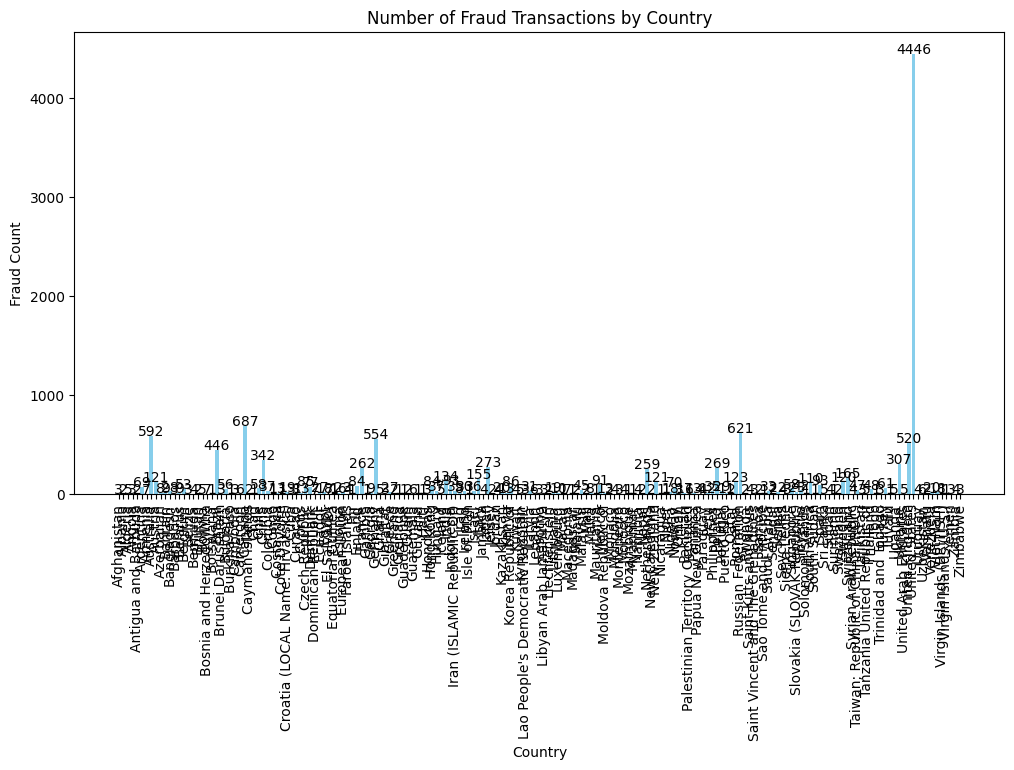

In [54]:
# Prepare data
country_counts = fraud_df_combined[fraud_df_combined['class'] == 1].groupby('country')['class'].count()
countries = country_counts.index
counts = country_counts.values

# Plot bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(countries, counts, color='skyblue')
plt.title('Number of Fraud Transactions by Country')
plt.xlabel('Country')
plt.ylabel('Fraud Count')
plt.xticks(rotation=90)

# Annotate values on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(height), ha='center')

plt.show()

**5. Feature Engineering**

Transaction frequency and velocity for Fraud_Data.csv


In [51]:
# Calculate transaction frequency and velocity
fraud_df['signup_purchase_time'] = (fraud_df['purchase_time'] - fraud_df['signup_time']).dt.total_seconds()

# Calculate total transactions per user
fraud_df['transaction_count'] = fraud_df.groupby('user_id')['user_id'].transform('count')

Time-Based features for Fraud_Data.csv

hour_of _day

Day_of_week


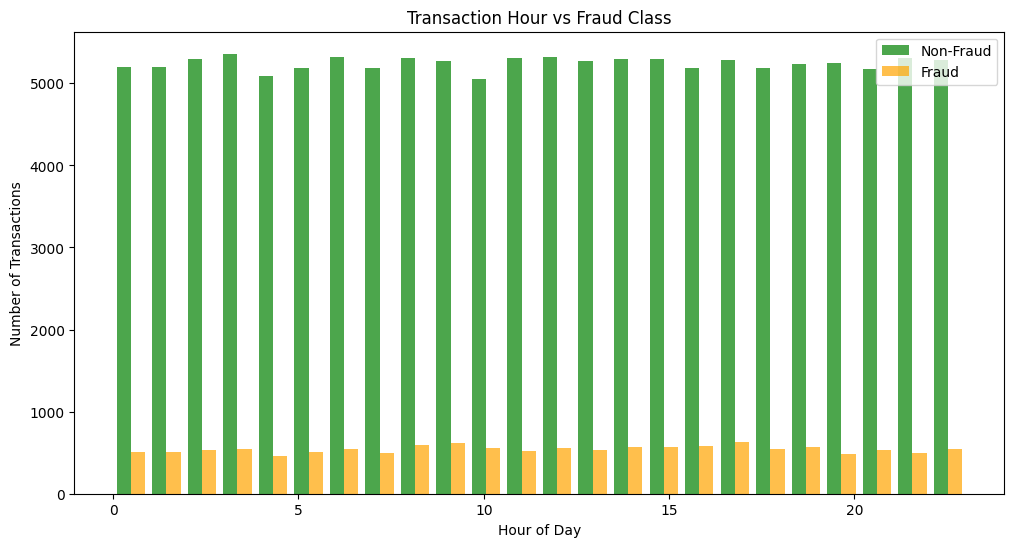

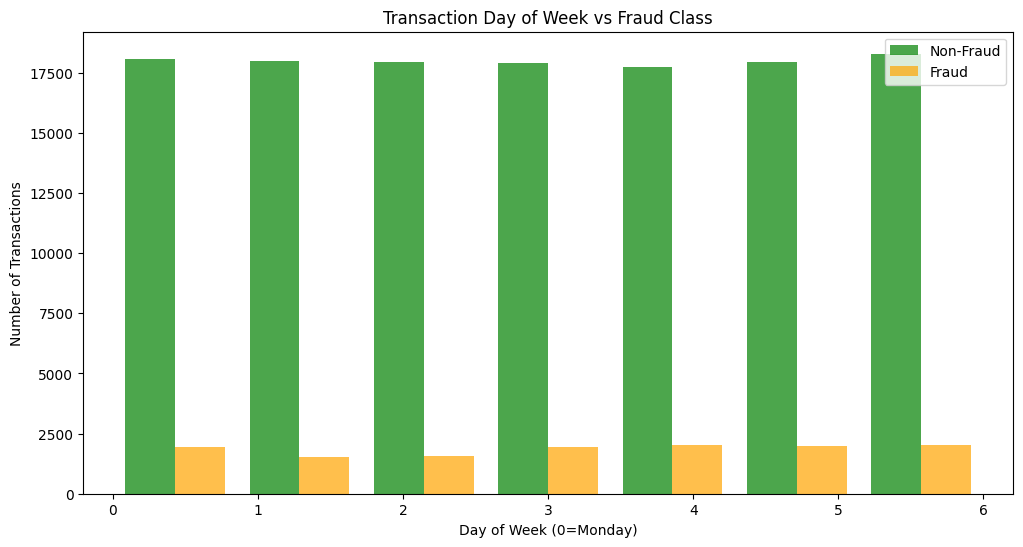

In [59]:
plt.figure(figsize=(12, 6))
plt.hist(
    [fraud_df_combined.loc[fraud_df_combined['class'] == 0, 'hour_of_day'],
     fraud_df_combined.loc[fraud_df_combined['class'] == 1, 'hour_of_day']],
    bins=24,  # 24 hours
    color=['green', 'orange'],
    label=['Non-Fraud', 'Fraud'],
    alpha=0.7
)
plt.title('Transaction Hour vs Fraud Class')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.legend()
plt.show()

# Histogram for Day of Week
plt.figure(figsize=(12, 6))
plt.hist(
    [fraud_df_combined.loc[fraud_df_combined['class'] == 0, 'day_of_week'],
     fraud_df_combined.loc[fraud_df_combined['class'] == 1, 'day_of_week']],
    bins=7,  # 7 days of the week
    color=['green', 'orange'],
    label=['Non-Fraud', 'Fraud'],
    alpha=0.7
)
plt.title('Transaction Day of Week vs Fraud Class')
plt.xlabel('Day of Week (0=Monday)')
plt.ylabel('Number of Transactions')
plt.legend()
plt.show()

time_since_signup: Calculate the duration between signup_time and purchase_time.

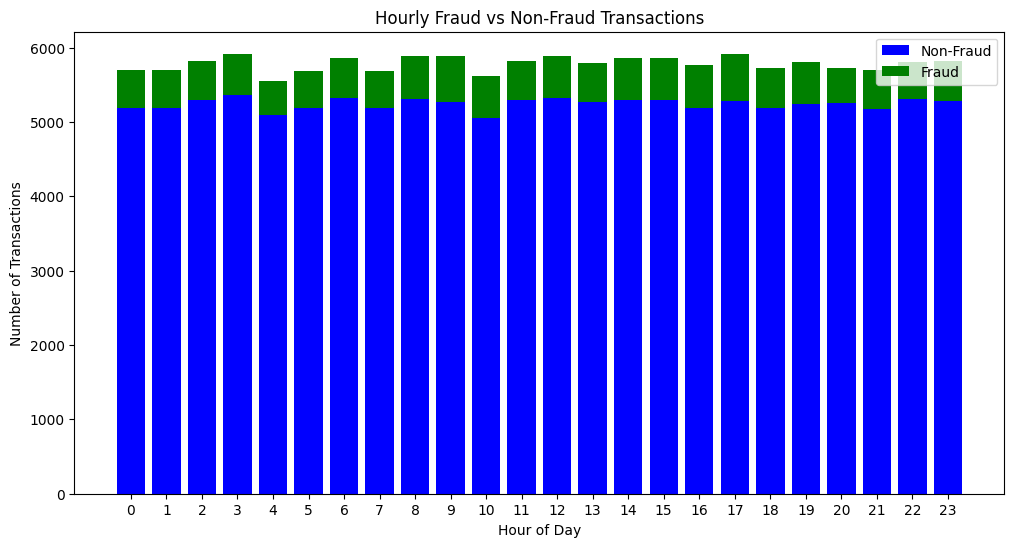

In [63]:
hours = np.arange(24)
fraud_counts = fraud_df_combined[fraud_df_combined['class'] == 1].groupby('hour_of_day')['class'].count().reindex(hours, fill_value=0)
nonfraud_counts = fraud_df_combined[fraud_df_combined['class'] == 0].groupby('hour_of_day')['class'].count().reindex(hours, fill_value=0)

# Plot stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(hours, nonfraud_counts, color='blue', label='Non-Fraud')
plt.bar(hours, fraud_counts, bottom=nonfraud_counts, color='green', label='Fraud')

plt.title('Hourly Fraud vs Non-Fraud Transactions')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(hours)
plt.legend()
plt.show()

In [64]:
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_add,signup_purchase_time,transaction_count
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,43.173.1.96,4506682.0,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,20.225.83.219,17944.0,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,156.64.132.28,1.0,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,228.234.6.235,492085.0,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,24.197.75.141,4361461.0,1


In [71]:
fraud_df_combined.drop(columns =['lower_bound_ip_address','upper_bound_ip_address'], inplace=True)
fraud_df_combined.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,class,ip_add,country,lower_ip,upper_ip,signup_purchase_time,transaction_count,hour_of_day,day_of_week
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,0,43.173.1.96,Australia,1.0.0.0,1.0.0.255,4506682.0,1,2,5
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,0,20.225.83.219,China,1.0.1.0,1.0.1.255,17944.0,1,1,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,1,156.64.132.28,China,1.0.2.0,1.0.3.255,1.0,1,18,3
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,0,228.234.6.235,Australia,1.0.4.0,1.0.7.255,492085.0,1,13,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,0,24.197.75.141,China,1.0.8.0,1.0.15.255,4361461.0,1,18,2


6. Data Transformation:


Normalization and Scaling (e.g., StandardScaler, MinMaxScaler).

In [ ]:
# Normalize the transaction amount and signup_purchase_time
scaler = StandardScaler()

fraud_df_combined[['purchase_value', 'signup_purchase_time']] = scaler.fit_transform(fraud_df_combined[['purchase_value', 'signup_purchase_time']])

Encode Categorical Features (e.g., One-Hot Encoding).

In [74]:
# Encode categorical variables using LabelEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = LabelEncoder()

fraud_df_combined['source'] = label_encoder.fit_transform(fraud_df_combined['source'])
fraud_df_combined['browser'] = label_encoder.fit_transform(fraud_df_combined['browser'])
fraud_df_combined['sex'] = label_encoder.fit_transform(fraud_df_combined['sex'])
fraud_df_combined['country'] = label_encoder.fit_transform(fraud_df_combined['country'])

# Check the dataset after encoding
fraud_df_combined.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,class,ip_add,country,lower_ip,upper_ip,signup_purchase_time,transaction_count,hour_of_day,day_of_week
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.159776,QVPSPJUOCKZAR,2,0,1,39,0,43.173.1.96,11,1.0.0.0,1.0.0.255,-0.136131,1,2,5
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142137,EOGFQPIZPYXFZ,0,0,0,53,0,20.225.83.219,42,1.0.1.0,1.0.1.255,-1.571694,1,1,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.196713,YSSKYOSJHPPLJ,2,3,1,53,1,156.64.132.28,42,1.0.2.0,1.0.3.255,-1.577432,1,18,3
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385981,ATGTXKYKUDUQN,2,4,1,41,0,228.234.6.235,11,1.0.4.0,1.0.7.255,-1.420057,1,13,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.113102,NAUITBZFJKHWW,0,4,1,45,0,24.197.75.141,42,1.0.8.0,1.0.15.255,-0.182575,1,18,2


Handle Class Imbalance: Analyze the class distribution. Research and apply appropriate sampling techniques (e.g., SMOTE for oversampling,

Featuring Engineering

In [78]:
display(fraud_df_combined.info())

<class 'pandas.core.frame.DataFrame'>
Index: 138846 entries, 0 to 138845
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   user_id               138846 non-null  int64         
 1   signup_time           138846 non-null  datetime64[ns]
 2   purchase_time         138846 non-null  datetime64[ns]
 3   purchase_value        138846 non-null  float64       
 4   device_id             138846 non-null  object        
 5   source                138846 non-null  int32         
 6   browser               138846 non-null  int32         
 7   sex                   138846 non-null  int32         
 8   age                   138846 non-null  int64         
 9   class                 138846 non-null  category      
 10  ip_add                138846 non-null  object        
 11  country               138846 non-null  int32         
 12  lower_ip              138846 non-null  object        
 13  uppe

None